In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
from tensorflow import nn
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Reshape
import cv2
import random
from sklearn import metrics
import seaborn as sns

In [2]:
# DATA LOADING
data = pd.read_csv('handwritten_chars/english.csv')
data_path = data['image'] # Holds the filepath to our images
data_label = data['label'] # Holds the true labels of our data

print(data_path.head())
print(data_label.head())

0    Img/img001-001.png
1    Img/img001-002.png
2    Img/img001-003.png
3    Img/img001-004.png
4    Img/img001-005.png
Name: image, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: label, dtype: object


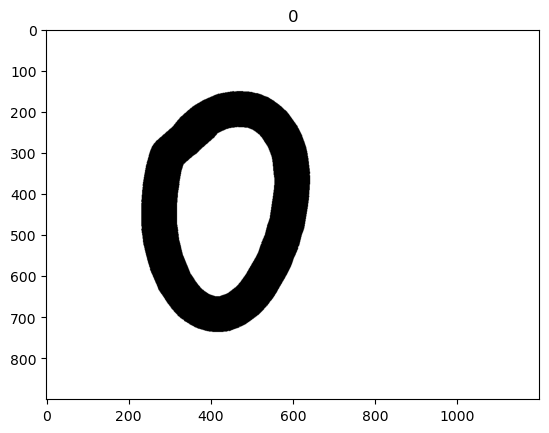

In [3]:
# Showing an example of what our data looks like
plt.title(data['label'][0])
image = img.imread('handwritten_chars/'+data['image'][0])
plt.imshow(image)
plt.show()

In [4]:
# DATA PREPROCESSING

In [4]:
# Will take in an array of file paths to train images and output corresponding RGB arrays
def prepare_train_images(input_arr):
    processed_images = []
    for i in range(len(input_arr)):
        image = cv2.imread('handwritten_chars/'+ input_arr['image'][i], cv2.IMREAD_GRAYSCALE) # Translate image to RGB array
        image = cv2.resize(image, (128, 128)) # Resize images to standardize
        processed_images.append([image, input_arr['label'][i]]) # Add RGB array and label to array
        print("Done: " + input_arr['image'][i])
    
    # shuffling our data 
    random.shuffle(processed_images)
    return processed_images
    
train_data = prepare_train_images(data) # Holds RGB array and label

Done: Img/img001-001.png
Done: Img/img001-002.png
Done: Img/img001-003.png
Done: Img/img001-004.png
Done: Img/img001-005.png
Done: Img/img001-006.png
Done: Img/img001-007.png
Done: Img/img001-008.png
Done: Img/img001-009.png
Done: Img/img001-010.png
Done: Img/img001-011.png
Done: Img/img001-012.png
Done: Img/img001-013.png
Done: Img/img001-014.png
Done: Img/img001-015.png
Done: Img/img001-016.png
Done: Img/img001-017.png
Done: Img/img001-018.png
Done: Img/img001-019.png
Done: Img/img001-020.png
Done: Img/img001-021.png
Done: Img/img001-022.png
Done: Img/img001-023.png
Done: Img/img001-024.png
Done: Img/img001-025.png
Done: Img/img001-026.png
Done: Img/img001-027.png
Done: Img/img001-028.png
Done: Img/img001-029.png
Done: Img/img001-030.png
Done: Img/img001-031.png
Done: Img/img001-032.png
Done: Img/img001-033.png
Done: Img/img001-034.png
Done: Img/img001-035.png
Done: Img/img001-036.png
Done: Img/img001-037.png
Done: Img/img001-038.png
Done: Img/img001-039.png
Done: Img/img001-040.png


Done: Img/img007-009.png
Done: Img/img007-010.png
Done: Img/img007-011.png
Done: Img/img007-012.png
Done: Img/img007-013.png
Done: Img/img007-014.png
Done: Img/img007-015.png
Done: Img/img007-016.png
Done: Img/img007-017.png
Done: Img/img007-018.png
Done: Img/img007-019.png
Done: Img/img007-020.png
Done: Img/img007-021.png
Done: Img/img007-022.png
Done: Img/img007-023.png
Done: Img/img007-024.png
Done: Img/img007-025.png
Done: Img/img007-026.png
Done: Img/img007-027.png
Done: Img/img007-028.png
Done: Img/img007-029.png
Done: Img/img007-030.png
Done: Img/img007-031.png
Done: Img/img007-032.png
Done: Img/img007-033.png
Done: Img/img007-034.png
Done: Img/img007-035.png
Done: Img/img007-036.png
Done: Img/img007-037.png
Done: Img/img007-038.png
Done: Img/img007-039.png
Done: Img/img007-040.png
Done: Img/img007-041.png
Done: Img/img007-042.png
Done: Img/img007-043.png
Done: Img/img007-044.png
Done: Img/img007-045.png
Done: Img/img007-046.png
Done: Img/img007-047.png
Done: Img/img007-048.png


Done: Img/img013-010.png
Done: Img/img013-011.png
Done: Img/img013-012.png
Done: Img/img013-013.png
Done: Img/img013-014.png
Done: Img/img013-015.png
Done: Img/img013-016.png
Done: Img/img013-017.png
Done: Img/img013-018.png
Done: Img/img013-019.png
Done: Img/img013-020.png
Done: Img/img013-021.png
Done: Img/img013-022.png
Done: Img/img013-023.png
Done: Img/img013-024.png
Done: Img/img013-025.png
Done: Img/img013-026.png
Done: Img/img013-027.png
Done: Img/img013-028.png
Done: Img/img013-029.png
Done: Img/img013-030.png
Done: Img/img013-031.png
Done: Img/img013-032.png
Done: Img/img013-033.png
Done: Img/img013-034.png
Done: Img/img013-035.png
Done: Img/img013-036.png
Done: Img/img013-037.png
Done: Img/img013-038.png
Done: Img/img013-039.png
Done: Img/img013-040.png
Done: Img/img013-041.png
Done: Img/img013-042.png
Done: Img/img013-043.png
Done: Img/img013-044.png
Done: Img/img013-045.png
Done: Img/img013-046.png
Done: Img/img013-047.png
Done: Img/img013-048.png
Done: Img/img013-049.png


Done: Img/img019-014.png
Done: Img/img019-015.png
Done: Img/img019-016.png
Done: Img/img019-017.png
Done: Img/img019-018.png
Done: Img/img019-019.png
Done: Img/img019-020.png
Done: Img/img019-021.png
Done: Img/img019-022.png
Done: Img/img019-023.png
Done: Img/img019-024.png
Done: Img/img019-025.png
Done: Img/img019-026.png
Done: Img/img019-027.png
Done: Img/img019-028.png
Done: Img/img019-029.png
Done: Img/img019-030.png
Done: Img/img019-031.png
Done: Img/img019-032.png
Done: Img/img019-033.png
Done: Img/img019-034.png
Done: Img/img019-035.png
Done: Img/img019-036.png
Done: Img/img019-037.png
Done: Img/img019-038.png
Done: Img/img019-039.png
Done: Img/img019-040.png
Done: Img/img019-041.png
Done: Img/img019-042.png
Done: Img/img019-043.png
Done: Img/img019-044.png
Done: Img/img019-045.png
Done: Img/img019-046.png
Done: Img/img019-047.png
Done: Img/img019-048.png
Done: Img/img019-049.png
Done: Img/img019-050.png
Done: Img/img019-051.png
Done: Img/img019-052.png
Done: Img/img019-053.png


Done: Img/img025-013.png
Done: Img/img025-014.png
Done: Img/img025-015.png
Done: Img/img025-016.png
Done: Img/img025-017.png
Done: Img/img025-018.png
Done: Img/img025-019.png
Done: Img/img025-020.png
Done: Img/img025-021.png
Done: Img/img025-022.png
Done: Img/img025-023.png
Done: Img/img025-024.png
Done: Img/img025-025.png
Done: Img/img025-026.png
Done: Img/img025-027.png
Done: Img/img025-028.png
Done: Img/img025-029.png
Done: Img/img025-030.png
Done: Img/img025-031.png
Done: Img/img025-032.png
Done: Img/img025-033.png
Done: Img/img025-034.png
Done: Img/img025-035.png
Done: Img/img025-036.png
Done: Img/img025-037.png
Done: Img/img025-038.png
Done: Img/img025-039.png
Done: Img/img025-040.png
Done: Img/img025-041.png
Done: Img/img025-042.png
Done: Img/img025-043.png
Done: Img/img025-044.png
Done: Img/img025-045.png
Done: Img/img025-046.png
Done: Img/img025-047.png
Done: Img/img025-048.png
Done: Img/img025-049.png
Done: Img/img025-050.png
Done: Img/img025-051.png
Done: Img/img025-052.png


Done: Img/img031-027.png
Done: Img/img031-028.png
Done: Img/img031-029.png
Done: Img/img031-030.png
Done: Img/img031-031.png
Done: Img/img031-032.png
Done: Img/img031-033.png
Done: Img/img031-034.png
Done: Img/img031-035.png
Done: Img/img031-036.png
Done: Img/img031-037.png
Done: Img/img031-038.png
Done: Img/img031-039.png
Done: Img/img031-040.png
Done: Img/img031-041.png
Done: Img/img031-042.png
Done: Img/img031-043.png
Done: Img/img031-044.png
Done: Img/img031-045.png
Done: Img/img031-046.png
Done: Img/img031-047.png
Done: Img/img031-048.png
Done: Img/img031-049.png
Done: Img/img031-050.png
Done: Img/img031-051.png
Done: Img/img031-052.png
Done: Img/img031-053.png
Done: Img/img031-054.png
Done: Img/img031-055.png
Done: Img/img032-001.png
Done: Img/img032-002.png
Done: Img/img032-003.png
Done: Img/img032-004.png
Done: Img/img032-005.png
Done: Img/img032-006.png
Done: Img/img032-007.png
Done: Img/img032-008.png
Done: Img/img032-009.png
Done: Img/img032-010.png
Done: Img/img032-011.png


Done: Img/img037-039.png
Done: Img/img037-040.png
Done: Img/img037-041.png
Done: Img/img037-042.png
Done: Img/img037-043.png
Done: Img/img037-044.png
Done: Img/img037-045.png
Done: Img/img037-046.png
Done: Img/img037-047.png
Done: Img/img037-048.png
Done: Img/img037-049.png
Done: Img/img037-050.png
Done: Img/img037-051.png
Done: Img/img037-052.png
Done: Img/img037-053.png
Done: Img/img037-054.png
Done: Img/img037-055.png
Done: Img/img038-001.png
Done: Img/img038-002.png
Done: Img/img038-003.png
Done: Img/img038-004.png
Done: Img/img038-005.png
Done: Img/img038-006.png
Done: Img/img038-007.png
Done: Img/img038-008.png
Done: Img/img038-009.png
Done: Img/img038-010.png
Done: Img/img038-011.png
Done: Img/img038-012.png
Done: Img/img038-013.png
Done: Img/img038-014.png
Done: Img/img038-015.png
Done: Img/img038-016.png
Done: Img/img038-017.png
Done: Img/img038-018.png
Done: Img/img038-019.png
Done: Img/img038-020.png
Done: Img/img038-021.png
Done: Img/img038-022.png
Done: Img/img038-023.png


Done: Img/img043-045.png
Done: Img/img043-046.png
Done: Img/img043-047.png
Done: Img/img043-048.png
Done: Img/img043-049.png
Done: Img/img043-050.png
Done: Img/img043-051.png
Done: Img/img043-052.png
Done: Img/img043-053.png
Done: Img/img043-054.png
Done: Img/img043-055.png
Done: Img/img044-001.png
Done: Img/img044-002.png
Done: Img/img044-003.png
Done: Img/img044-004.png
Done: Img/img044-005.png
Done: Img/img044-006.png
Done: Img/img044-007.png
Done: Img/img044-008.png
Done: Img/img044-009.png
Done: Img/img044-010.png
Done: Img/img044-011.png
Done: Img/img044-012.png
Done: Img/img044-013.png
Done: Img/img044-014.png
Done: Img/img044-015.png
Done: Img/img044-016.png
Done: Img/img044-017.png
Done: Img/img044-018.png
Done: Img/img044-019.png
Done: Img/img044-020.png
Done: Img/img044-021.png
Done: Img/img044-022.png
Done: Img/img044-023.png
Done: Img/img044-024.png
Done: Img/img044-025.png
Done: Img/img044-026.png
Done: Img/img044-027.png
Done: Img/img044-028.png
Done: Img/img044-029.png


Done: Img/img050-006.png
Done: Img/img050-007.png
Done: Img/img050-008.png
Done: Img/img050-009.png
Done: Img/img050-010.png
Done: Img/img050-011.png
Done: Img/img050-012.png
Done: Img/img050-013.png
Done: Img/img050-014.png
Done: Img/img050-015.png
Done: Img/img050-016.png
Done: Img/img050-017.png
Done: Img/img050-018.png
Done: Img/img050-019.png
Done: Img/img050-020.png
Done: Img/img050-021.png
Done: Img/img050-022.png
Done: Img/img050-023.png
Done: Img/img050-024.png
Done: Img/img050-025.png
Done: Img/img050-026.png
Done: Img/img050-027.png
Done: Img/img050-028.png
Done: Img/img050-029.png
Done: Img/img050-030.png
Done: Img/img050-031.png
Done: Img/img050-032.png
Done: Img/img050-033.png
Done: Img/img050-034.png
Done: Img/img050-035.png
Done: Img/img050-036.png
Done: Img/img050-037.png
Done: Img/img050-038.png
Done: Img/img050-039.png
Done: Img/img050-040.png
Done: Img/img050-041.png
Done: Img/img050-042.png
Done: Img/img050-043.png
Done: Img/img050-044.png
Done: Img/img050-045.png


Done: Img/img056-010.png
Done: Img/img056-011.png
Done: Img/img056-012.png
Done: Img/img056-013.png
Done: Img/img056-014.png
Done: Img/img056-015.png
Done: Img/img056-016.png
Done: Img/img056-017.png
Done: Img/img056-018.png
Done: Img/img056-019.png
Done: Img/img056-020.png
Done: Img/img056-021.png
Done: Img/img056-022.png
Done: Img/img056-023.png
Done: Img/img056-024.png
Done: Img/img056-025.png
Done: Img/img056-026.png
Done: Img/img056-027.png
Done: Img/img056-028.png
Done: Img/img056-029.png
Done: Img/img056-030.png
Done: Img/img056-031.png
Done: Img/img056-032.png
Done: Img/img056-033.png
Done: Img/img056-034.png
Done: Img/img056-035.png
Done: Img/img056-036.png
Done: Img/img056-037.png
Done: Img/img056-038.png
Done: Img/img056-039.png
Done: Img/img056-040.png
Done: Img/img056-041.png
Done: Img/img056-042.png
Done: Img/img056-043.png
Done: Img/img056-044.png
Done: Img/img056-045.png
Done: Img/img056-046.png
Done: Img/img056-047.png
Done: Img/img056-048.png
Done: Img/img056-049.png


Done: Img/img062-008.png
Done: Img/img062-009.png
Done: Img/img062-010.png
Done: Img/img062-011.png
Done: Img/img062-012.png
Done: Img/img062-013.png
Done: Img/img062-014.png
Done: Img/img062-015.png
Done: Img/img062-016.png
Done: Img/img062-017.png
Done: Img/img062-018.png
Done: Img/img062-019.png
Done: Img/img062-020.png
Done: Img/img062-021.png
Done: Img/img062-022.png
Done: Img/img062-023.png
Done: Img/img062-024.png
Done: Img/img062-025.png
Done: Img/img062-026.png
Done: Img/img062-027.png
Done: Img/img062-028.png
Done: Img/img062-029.png
Done: Img/img062-030.png
Done: Img/img062-031.png
Done: Img/img062-032.png
Done: Img/img062-033.png
Done: Img/img062-034.png
Done: Img/img062-035.png
Done: Img/img062-036.png
Done: Img/img062-037.png
Done: Img/img062-038.png
Done: Img/img062-039.png
Done: Img/img062-040.png
Done: Img/img062-041.png
Done: Img/img062-042.png
Done: Img/img062-043.png
Done: Img/img062-044.png
Done: Img/img062-045.png
Done: Img/img062-046.png
Done: Img/img062-047.png


a


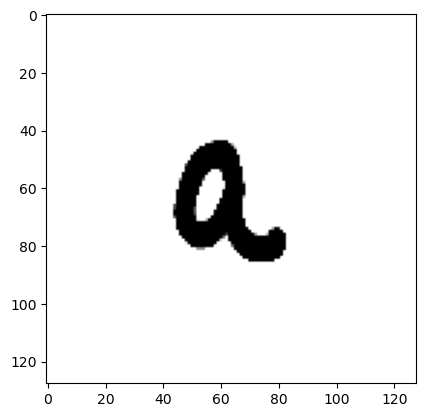

In [6]:
# Show an example of the resized image, also shows how to access label and RGB
print(train_data[0][1]) # To access the label
plt.imshow(train_data[0][0], cmap = 'gray') # To access the image
plt.show()

In [6]:
x = []
y = []

# preparing features and labels
for features, label in train_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, 128, 128, 1)
x = x/255.0 # Scaling our data to be between 0 and 1.

y = np.array(y)

In [7]:
#Changing all of our labels into numeric values by generating a dict.
numeric_labels = {}
unique_labels = 0

for label in y:
    flag = 0
    keys_list = numeric_labels.keys()
    for key in keys_list:
        if label == key: # If key exists already, flag as already in dict.
            flag = 1
            break
    if flag == 0: # If label has not been listed as a key yet, update dict with label as a new key with unique value.
        numeric_labels.update({str(label) : int(unique_labels)})
        unique_labels += 1

print(numeric_labels)

{'B': 0, '2': 1, '6': 2, 'H': 3, 'O': 4, '8': 5, 'S': 6, 'M': 7, 'o': 8, 'j': 9, 'e': 10, 'k': 11, 'v': 12, 'J': 13, 's': 14, 'f': 15, 'T': 16, '1': 17, '9': 18, 'F': 19, 'A': 20, 'Y': 21, 'd': 22, 'n': 23, 'W': 24, 'l': 25, 'R': 26, 'U': 27, 'm': 28, 'C': 29, '0': 30, 'i': 31, 'h': 32, 'V': 33, 'g': 34, 'Z': 35, 'I': 36, 'Q': 37, 'x': 38, '4': 39, 'b': 40, 'r': 41, '7': 42, '3': 43, 'X': 44, 'K': 45, 'L': 46, 'z': 47, '5': 48, 'y': 49, 't': 50, 'c': 51, 'a': 52, 'q': 53, 'E': 54, 'w': 55, 'p': 56, 'G': 57, 'u': 58, 'N': 59, 'P': 60, 'D': 61}


In [10]:
# Changing all of our y values into their numeric equivalent.
y_num = []
for i in range(len(y)):
    y_num.append(numeric_labels[y[i]])
        
y_num = np.array(y_num)

# One hot encode to prepare labels for feeding through model
y_num = tf.keras.utils.to_categorical(y_num, num_classes=62)
    
print(y[0])
print(y_num[0])

B
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
print(y_num.shape)

(3410, 62)


In [11]:
# Creating our model
model = Sequential()

# First Layer
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(128, 128, 1), kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))  # L1_L2 regularization to help prevent overfitting
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2)) # Dropout layers to assist with increasing our validation accuracy and lower our model overfitting.

# Second Layer
model.add(Conv2D(32, (3,3), 1, activation='relu')) # 32 3*3 Filters - Strides of 1
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Third Layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fourth Layer
model.add(Flatten()) # Flatten output to prepare for feeding into Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))


# Output
model.add(Dense(62, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

#stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

history = model.fit(x, y_num, batch_size=32, epochs=50, validation_split=0.15, callbacks=[learning_rate])




Epoch 1/50


91/91 [==============================] - 10s 101ms/step - loss: 4.2783 - accuracy: 0.0145 - val_loss: 4.1897 - val_accuracy: 0.0254 - lr: 0.0010
Epoch 2/50
91/91 [==============================] - 9s 98ms/step - loss: 3.8247 - accuracy: 0.0901 - val_loss: 3.1579 - val_accuracy: 0.2383 - lr: 0.0010
Epoch 3/50
91/91 [==============================] - 9s 99ms/step - loss: 2.8904 - accuracy: 0.2654 - val_loss: 2.3934 - val_accuracy: 0.3887 - lr: 0.0010
Epoch 4/50
91/91 [==============================] - 9s 96ms/step - loss: 2.1932 - accuracy: 0.4244 - val_loss: 1.9828 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 5/50
91/91 [==============================] - 9s 98ms/step - loss: 1.6648 - accuracy: 0.5535 - val_loss: 1.8092 - val_accuracy: 0.5195 - lr: 0.0010
Epoch 6/50
91/91 [==============================] - 9s 99ms/step - loss: 1.3646 - accuracy: 0.6222 - val_loss: 1.6429 - val_accuracy: 0.5547 - lr: 0.0010
Epoch 7/50
91/91 [==============================] - 9s 97ms/step - lo

91/91 [==============================] - 9s 99ms/step - loss: 0.1360 - accuracy: 0.9617 - val_loss: 2.2451 - val_accuracy: 0.6348 - lr: 0.0010
Epoch 48/50
91/91 [==============================] - 9s 97ms/step - loss: 0.1532 - accuracy: 0.9600 - val_loss: 2.0630 - val_accuracy: 0.6387 - lr: 0.0010
Epoch 49/50
91/91 [==============================] - 9s 97ms/step - loss: 0.1472 - accuracy: 0.9596 - val_loss: 1.9675 - val_accuracy: 0.6582 - lr: 0.0010
Epoch 50/50
91/91 [==============================] - 9s 95ms/step - loss: 0.1148 - accuracy: 0.9720 - val_loss: 2.2314 - val_accuracy: 0.6406 - lr: 0.0010


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation (Activation)     (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                   

In [13]:
results = model.get_metrics_result()
print(results['accuracy'])

tf.Tensor(0.640625, shape=(), dtype=float32)


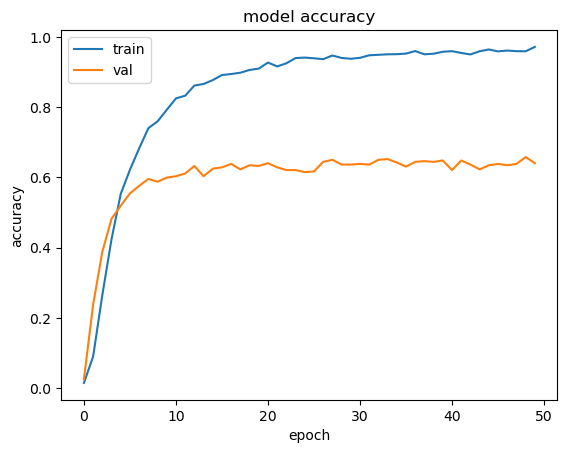

In [14]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

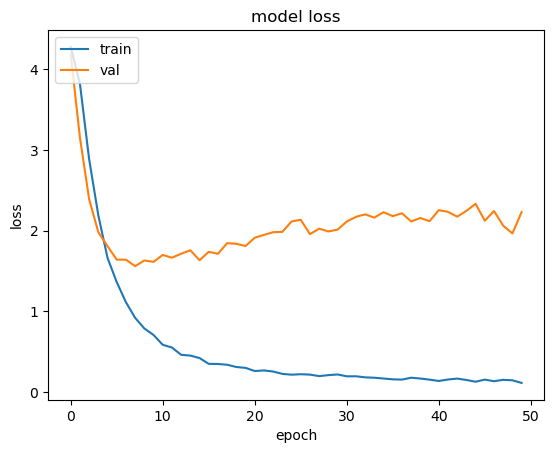

In [15]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
predict = model.predict(x)

107/107 [==============================] - 2s 18ms/step


In [17]:
y_predict = np.argmax(predict, axis=1)
y_true = np.argmax(y_num, axis=1)

y_num.shape

(3410, 62)

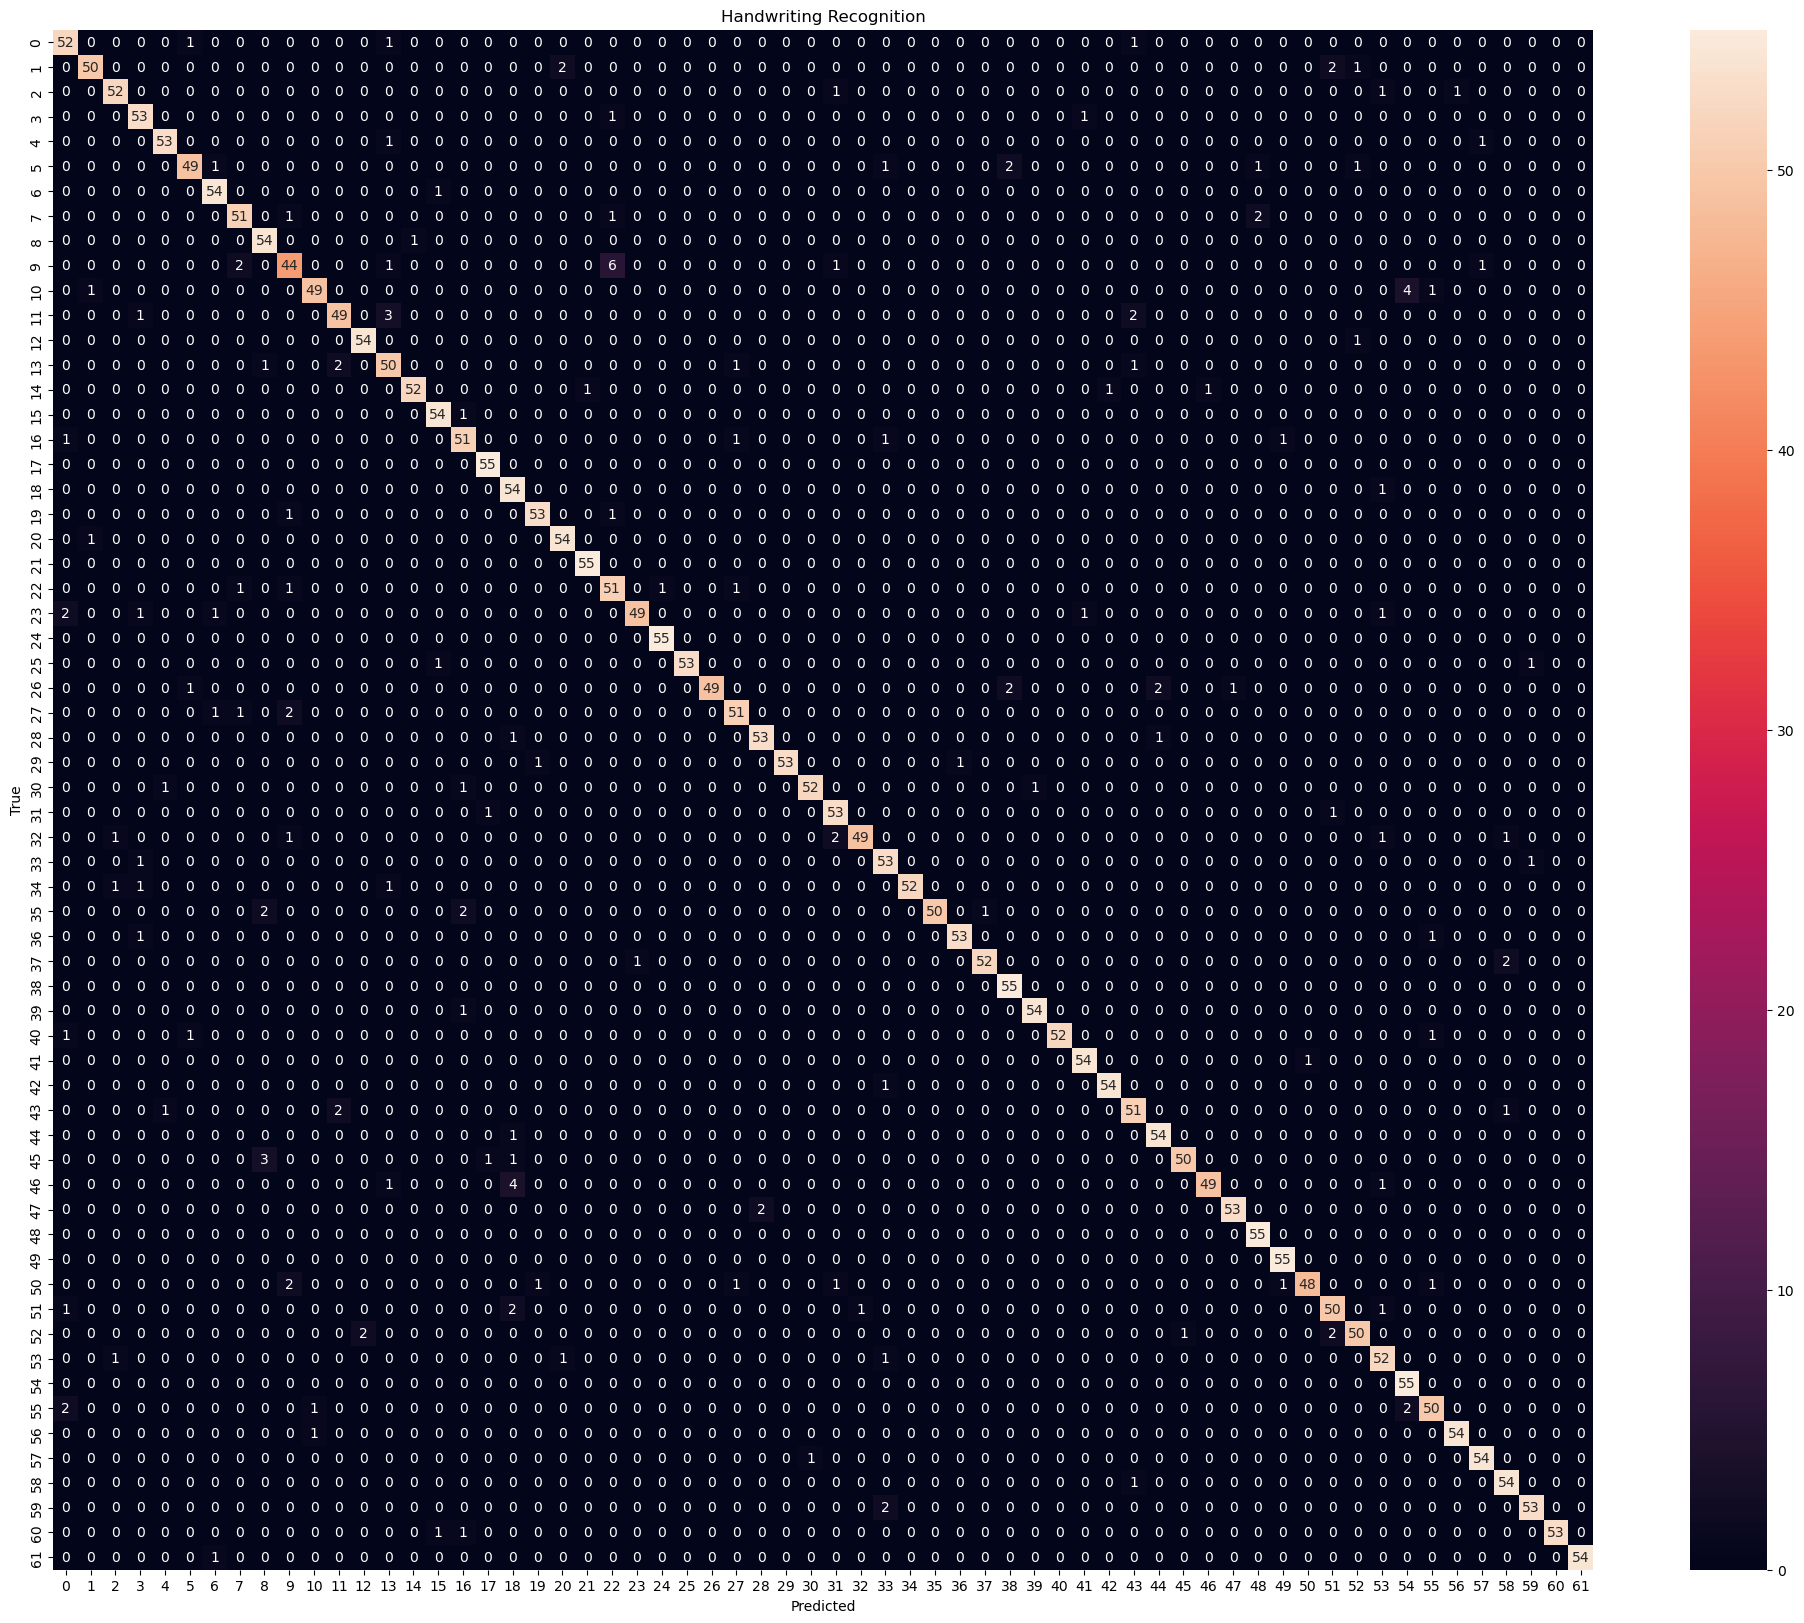

In [18]:
cm = metrics.confusion_matrix(y_true, y_predict)
plt.figure(figsize=(25, 20))
sns.heatmap(cm, annot=True, fmt='d', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Handwriting Recognition')
plt.show()